# Aplicación: Transformaciones Lineales y Rotación de un Dado

## Introducción

En esta actividad, vamos a desarrollar una aplicación que permite visualizar la rotación de un dado en 3D utilizando **matrices de rotación**. El objetivo es enseñar a los estudiantes de ingeniería cómo aplicar **transformaciones lineales** a un objeto tridimensional y comprender cómo las rotaciones afectan las posiciones de sus vértices y caras.

### Conceptos Fundamentales

Antes de comenzar con la aplicación, repasemos algunos conceptos básicos sobre **rotaciones en 3D** y **transformaciones lineales**.

#### Transformaciones Lineales

Una transformación lineal es una operación que toma un vector de un espacio y lo transforma en otro vector, preservando las propiedades de adición y multiplicación por escalar. Las transformaciones comunes incluyen:
- Rotaciones
- Escalados
- Reflexiones
- Proyecciones

En este ejercicio nos enfocaremos en **rotaciones**.

#### Rotación en el Espacio 3D

Para rotar un objeto tridimensional, usamos **matrices de rotación**. Una rotación en 3D se realiza alrededor de uno de los tres ejes cartesianos: **X**, **Y**, o **Z**.

Las matrices de rotación para cada eje son:

- **Rotación 1**:
  $$
  R_1(\theta) = \begin{pmatrix}
  \cos\theta & -\sin\theta & 0 \\
  \sin\theta & \cos\theta & 0 \\
  0 & 0 & 1
  \end{pmatrix}
  $$

- **Rotación 2**:
  $$
  R_2(\theta) = \begin{pmatrix}
  1 & 0 & 0 \\
  0 & \cos\theta & -\sin\theta \\
  0 & \sin\theta & \cos\theta
  \end{pmatrix}
  $$

- **Rotación 2**:
  $$
  R_3(\theta) = \begin{pmatrix}
  \cos\theta & 0 & \sin\theta \\
  0 & 1 & 0 \\
  -\sin\theta & 0 & \cos\theta
  \end{pmatrix}
  $$



Donde $\theta$ es el ángulo de rotación.



## Desarrollo de la Aplicación

### Herramientas necesarias

Para implementar la aplicación en Python, utilizaremos las siguientes bibliotecas:
- **NumPy** para realizar cálculos matriciales.
- **Matplotlib** para la visualización 3D.




Para escrcribir una matriz en Python, usamos la biblioteca NumPy. Por ejemplo, para definir la matriz de rotación \( R_x(\theta) \) alrededor del eje X, usamos el siguiente código:

```python

import numpy as np

A=np.array([[1, 0, 0],
            [0, -2, 0],
            [0, 0, 1]])
        
```
Para escribir un vector fila 

```python

import numpy as np
b=np.array([2, 3, 4])
        
``` 

para escribir un vector columna, usamos el siguiente código:

```python

import numpy as np
b=np.array([[1],
            [2],
            [3]])
        
``` 

Ahora supongamos que queremos encontrar el determinante de la matriz A, usamos el siguiente código:

```python
import numpy as np

A=np.array([[1, 0, 0],
            [0, -2, 0],
            [0, 0, 1]])

det_A=np.linalg.det(A)
print(det_A)
```

Ahora supongamos que queremos encontrar la inversa de la matriz A, usamos el siguiente código:

```python
import numpy as np

A=np.array([[1, 0, 0],
            [0, -2, 0],
            [0, 0, 1]])

A_inv=np.linalg.inv(A)
print(A_inv)
```
y si queremos solucionar un sistema de ecuaciones lineales, usamos el siguiente código:

$$\begin{bmatrix}
1 & 0 & 0 \\
0 & -2 & 0 \\
0 & 0 & 1
\end{bmatrix} \begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} = \begin{bmatrix}
1 \\
2 \\
3
\end{bmatrix}$$


```python
import numpy as np

A=np.array([[1, 0, 0],
            [0, -2, 0],
            [0, 0, 1]])
b=np.array([[1],
            [2],
            [3]])

x=np.linalg.solve(A,b)
print(x)
```

Ahora si queremos encontrar la matriz escalonada de la matriz A, usamos el siguiente código:

```python
import numpy as np

A=np.array([[1, 0, 0],
            [0, -2, 0],
            [0, 0, 1]])

A_escal=np.linalg.matrix_rank(A)

print(A_escal)
```




In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Función para crear los vértices de un cubo (dado)
def crear_dado():
    puntos = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0],
                       [0, 0, 1], [1, 0, 1], [1, 1, 1], [0, 1, 1]])
    return puntos - 0.5  # Centrar el cubo en el origen

# Función para crear las caras del dado
def crear_caras(puntos):
    caras = [[puntos[j] for j in [0, 1, 2, 3]],  # Cara inferior
             [puntos[j] for j in [4, 5, 6, 7]],  # Cara superior
             [puntos[j] for j in [0, 1, 5, 4]],  # Cara frontal
             [puntos[j] for j in [2, 3, 7, 6]],  # Cara trasera
             [puntos[j] for j in [0, 3, 7, 4]],  # Cara izquierda
             [puntos[j] for j in [1, 2, 6, 5]]]  # Cara derecha
    return caras

# Función de rotación en 3D
def rotacion_3d(puntos, angulo, eje='x'):
    theta = np.radians(angulo)
    if eje == 'x':
        R = np.array([[1, 0, 0],
                      [0, np.cos(theta), -np.sin(theta)],
                      [0, np.sin(theta), np.cos(theta)]])
    elif eje == 'y':
        R = np.array([[np.cos(theta), 0, np.sin(theta)],
                      [0, 1, 0],
                      [-np.sin(theta), 0, np.cos(theta)]])
    elif eje == 'z':
        R = np.array([[np.cos(theta), -np.sin(theta), 0],
                      [np.sin(theta), np.cos(theta), 0],
                      [0, 0, 1]])
    return np.dot(puntos, R.T)

# Función para dibujar el dado
def dibujar_dado(puntos, titulo="Dado"):
    caras = crear_caras(puntos)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Crear la colección de caras
    ax.add_collection3d(Poly3DCollection(caras, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.25))
    
    # Ajustar límites y etiquetas
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje Z')
    plt.title(titulo)
    plt.show()

# Crear el dado original
dado = crear_dado()



## **Pregunta 1: Rotación en el eje X**

- Rota el dado **90 grados** alrededor del eje X y observa el resultado.
- ¿Cómo cambian las posiciones de los vértices y las caras del dado después de esta rotación?


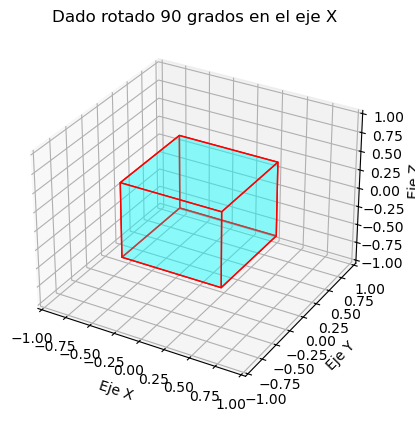

In [4]:

# Pregunta 1: Rotar el dado 90 grados en el eje X
dado_rotado_x = rotacion_3d(dado, 90, eje='x')
dibujar_dado(dado_rotado_x, "Dado rotado 90 grados en el eje X")



## **Pregunta 2: Rotación en múltiples ejes**

- Rota el dado **45 grados** alrededor del eje X, seguido de una rotación de **30 grados** alrededor del eje Y, y finalmente **60 grados** alrededor del eje Z.
- ¿Cuál es la orientación final del dado? ¿Qué cambios observas en las caras del dado?


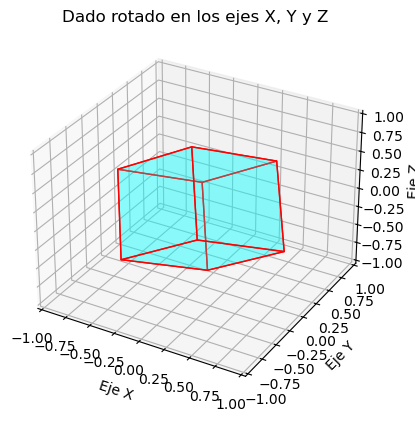

In [5]:
# Pregunta 2: Rotar el dado 45° en el eje X, 30° en el eje Y, 60° en el eje Z
dado_rotado_xyz = rotacion_3d(dado, 45, eje='x')
dado_rotado_xyz = rotacion_3d(dado_rotado_xyz, 30, eje='y')
dado_rotado_xyz = rotacion_3d(dado_rotado_xyz, 60, eje='z')
dibujar_dado(dado_rotado_xyz, "Dado rotado en los ejes X, Y y Z")




## **Pregunta 3: Rotación continua en el eje Y**

- Escribe una función que rote el dado continuamente alrededor del eje Y desde 0° a 360°.
- Dibuja el dado en diferentes etapas de la rotación y analiza cómo se mueven las caras del dado.


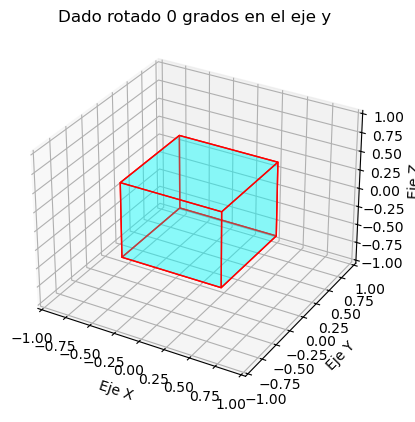

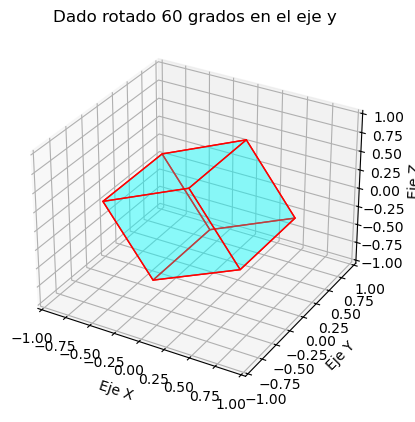

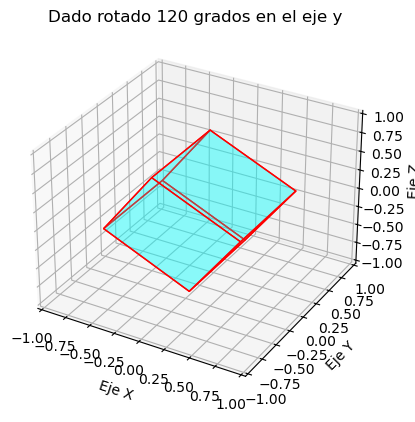

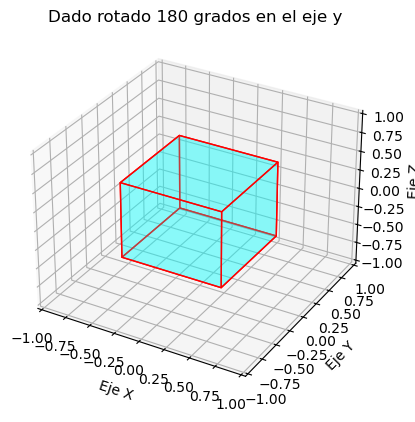

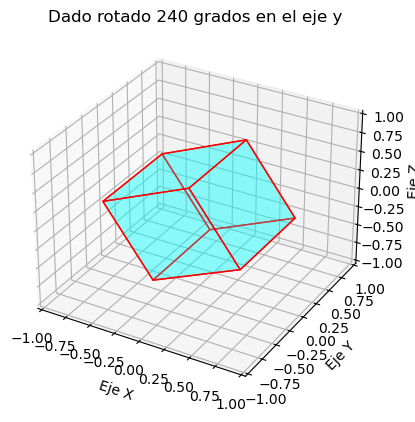

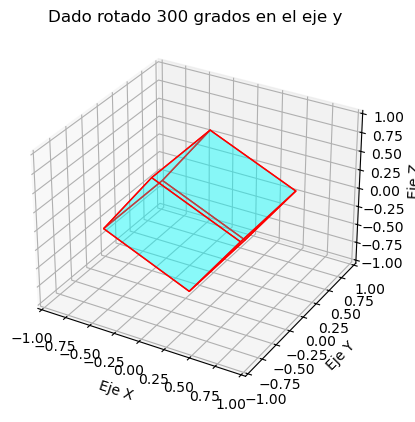

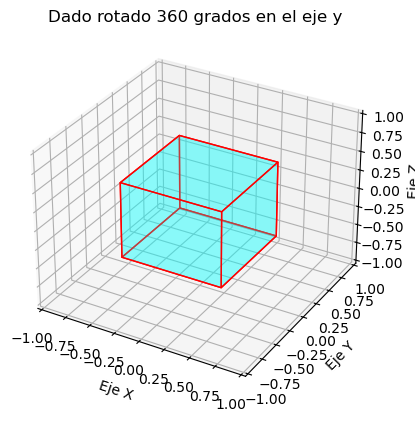

In [6]:
# Pregunta 3: Rotación continua en el eje Y
def rotacion_continua(puntos, angulos, eje='y'):
    for angulo in angulos:
        puntos_rotados = rotacion_3d(puntos, angulo, eje=eje)
        dibujar_dado(puntos_rotados, f"Dado rotado {angulo} grados en el eje {eje}")

# Rotación continua de 0° a 360° en el eje Y
rotacion_continua(dado, range(0, 361, 60), eje='y')




## **Pregunta 4: Rotación y perspectiva**

- Combina una rotación de **45 grados** en el eje Y con una rotación de **45 grados** en el eje Z. Observa cómo las caras del dado parecen cambiar desde la perspectiva del observador.
- ¿Cómo afecta esta combinación de rotaciones a la visualización del dado?


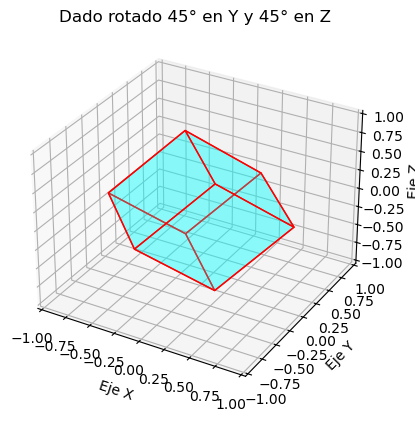

In [7]:
# Pregunta 4: Rotar 45° en el eje Y y 45° en el eje Z
dado_rotado_yz = rotacion_3d(dado, 45, eje='y')
dado_rotado_yz = rotacion_3d(dado_rotado_yz, 45, eje='z')
dibujar_dado(dado_rotado_yz, "Dado rotado 45° en Y y 45° en Z")




## **Pregunta 5: Aplicación de una secuencia de rotaciones**

- Rota el dado **30 grados** en el eje X, luego **60 grados** en el eje Y, y finalmente **90 grados** en el eje Z. Anota las coordenadas finales de un vértice específico del dado.
- Compara las coordenadas del vértice inicial y final. ¿Cuál es el impacto de aplicar rotaciones secuenciales en los vértices?


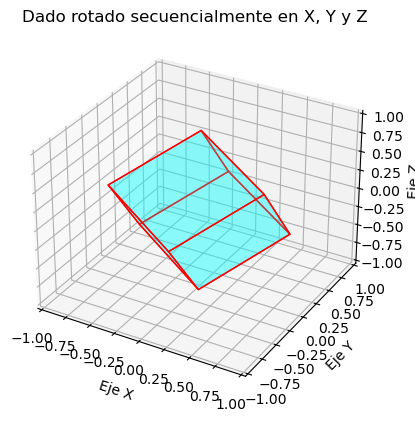

Vértice original: [-0.5 -0.5 -0.5]
Vértice después de la rotación: [ 0.1830127  -0.84150635  0.09150635]


In [8]:
# Pregunta 5: Secuencia de rotaciones (X: 30°, Y: 60°, Z: 90°)
dado_rotado_seq = rotacion_3d(dado, 30, eje='x')
dado_rotado_seq = rotacion_3d(dado_rotado_seq, 60, eje='y')
dado_rotado_seq = rotacion_3d(dado_rotado_seq, 90, eje='z')
dibujar_dado(dado_rotado_seq, "Dado rotado secuencialmente en X, Y y Z")

# Coordenadas finales de un vértice específico
vertice_original = dado[0]  # Primer vértice
vertice_final = dado_rotado_seq[0]
print(f"Vértice original: {vertice_original}")
print(f"Vértice después de la rotación: {vertice_final}")
